<a href="https://colab.research.google.com/github/Lokesh-M094/Soft-Computing-Mini-Project/blob/main/Soft_Computing_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# Replace with the actual dataset path
data = pd.read_csv("/content/household_power_consumption.csv")

# Check the data structure
print(data.head())


         Date      Time Global_active_power Global_reactive_power Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.84   
1  16/12/2006  17:25:00                5.36                 0.436  233.63   
2  16/12/2006  17:26:00               5.374                 0.498  233.29   
3  16/12/2006  17:27:00               5.388                 0.502  233.74   
4  16/12/2006  17:28:00               3.666                 0.528  235.68   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0             18.4              0              1            17.0  
1               23              0              1            16.0  
2               23              0              2            17.0  
3               23              0              1            17.0  
4             15.8              0              1            17.0  


In [ ]:

# Combine 'Date' and 'Time' into a 'datetime' column
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop original 'Date' and 'Time' columns
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Convert relevant columns to numeric
numeric_cols = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Extract time features
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data['weekday'] = data['datetime'].dt.weekday


<ipython-input-5-64536a4ee393>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# Features (X) and Target (y)
features = ['hour', 'day', 'month', 'weekday', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
X = data[features]
y = data['Global_active_power']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")



RMSE: 0.32482647171120793
MAE: 0.15716867577240906
R² Score: 0.9253136166975248


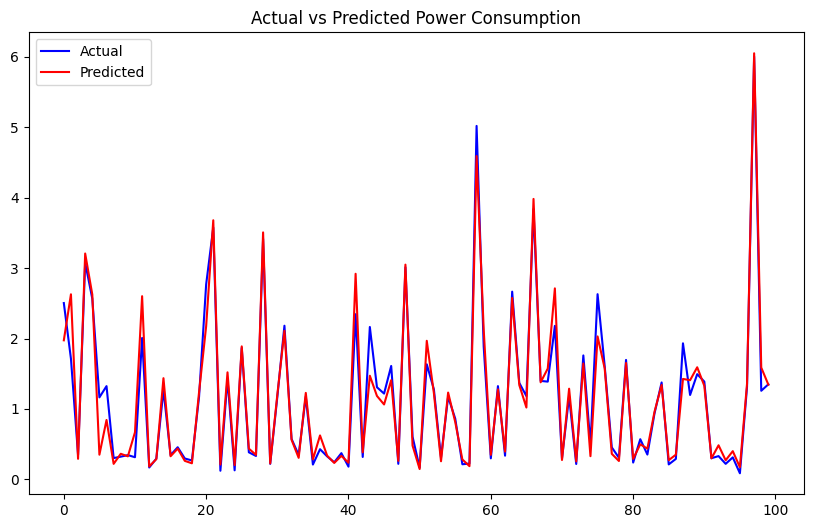

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Actual", color='blue')
plt.plot(y_pred[:100], label="Predicted", color='red')
plt.title("Actual vs Predicted Power Consumption")
plt.legend()
plt.show()
